<a href="https://colab.research.google.com/github/Meyyaou/pythondaily/blob/main/STEP3-Visualisation/AnalysisDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#step1: read the file
df=pd.read_csv('/content/Thyroid_Diff.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
#step2: etude and know what to search(var of results) => if structured/not
df.dtypes
df['Response'].value_counts()
#does that mean these rows are duplicated and we should drop them
#df[df.duplicated(keep=False)==True]

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [ ]:
df['Risk'].value_counts()

Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64

In [ ]:
#step3: verif nan vals/outline analysis(= noise data => drop them)
df.isnull().sum()
#no nan vals

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
#step4: normalize data
#format all binary var to 0 and 1 0=> yes 1 => no
#Smoking	Hx Smoking	Hx Radiothreapy Recurred
df_norm= df.replace({'No': 1, 'Yes': 0})

df_norm['Adenopathy'].replace(1, 'No', inplace=True)


In [ ]:
#to encode qualitive cols we use get_dummies which converts categorical data into dummy or indicator variables.
#Thyroid Function Physical Examination Adenopathy Pathology Focality Risk T N M Stage Response Gender
df_norm = pd.get_dummies(data=df_norm, columns=['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology','Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Gender'])
#df_norm.info()

In [ ]:
variables = [col for col in df_norm.columns if df_norm[col].dtype in [int, float, bool]]

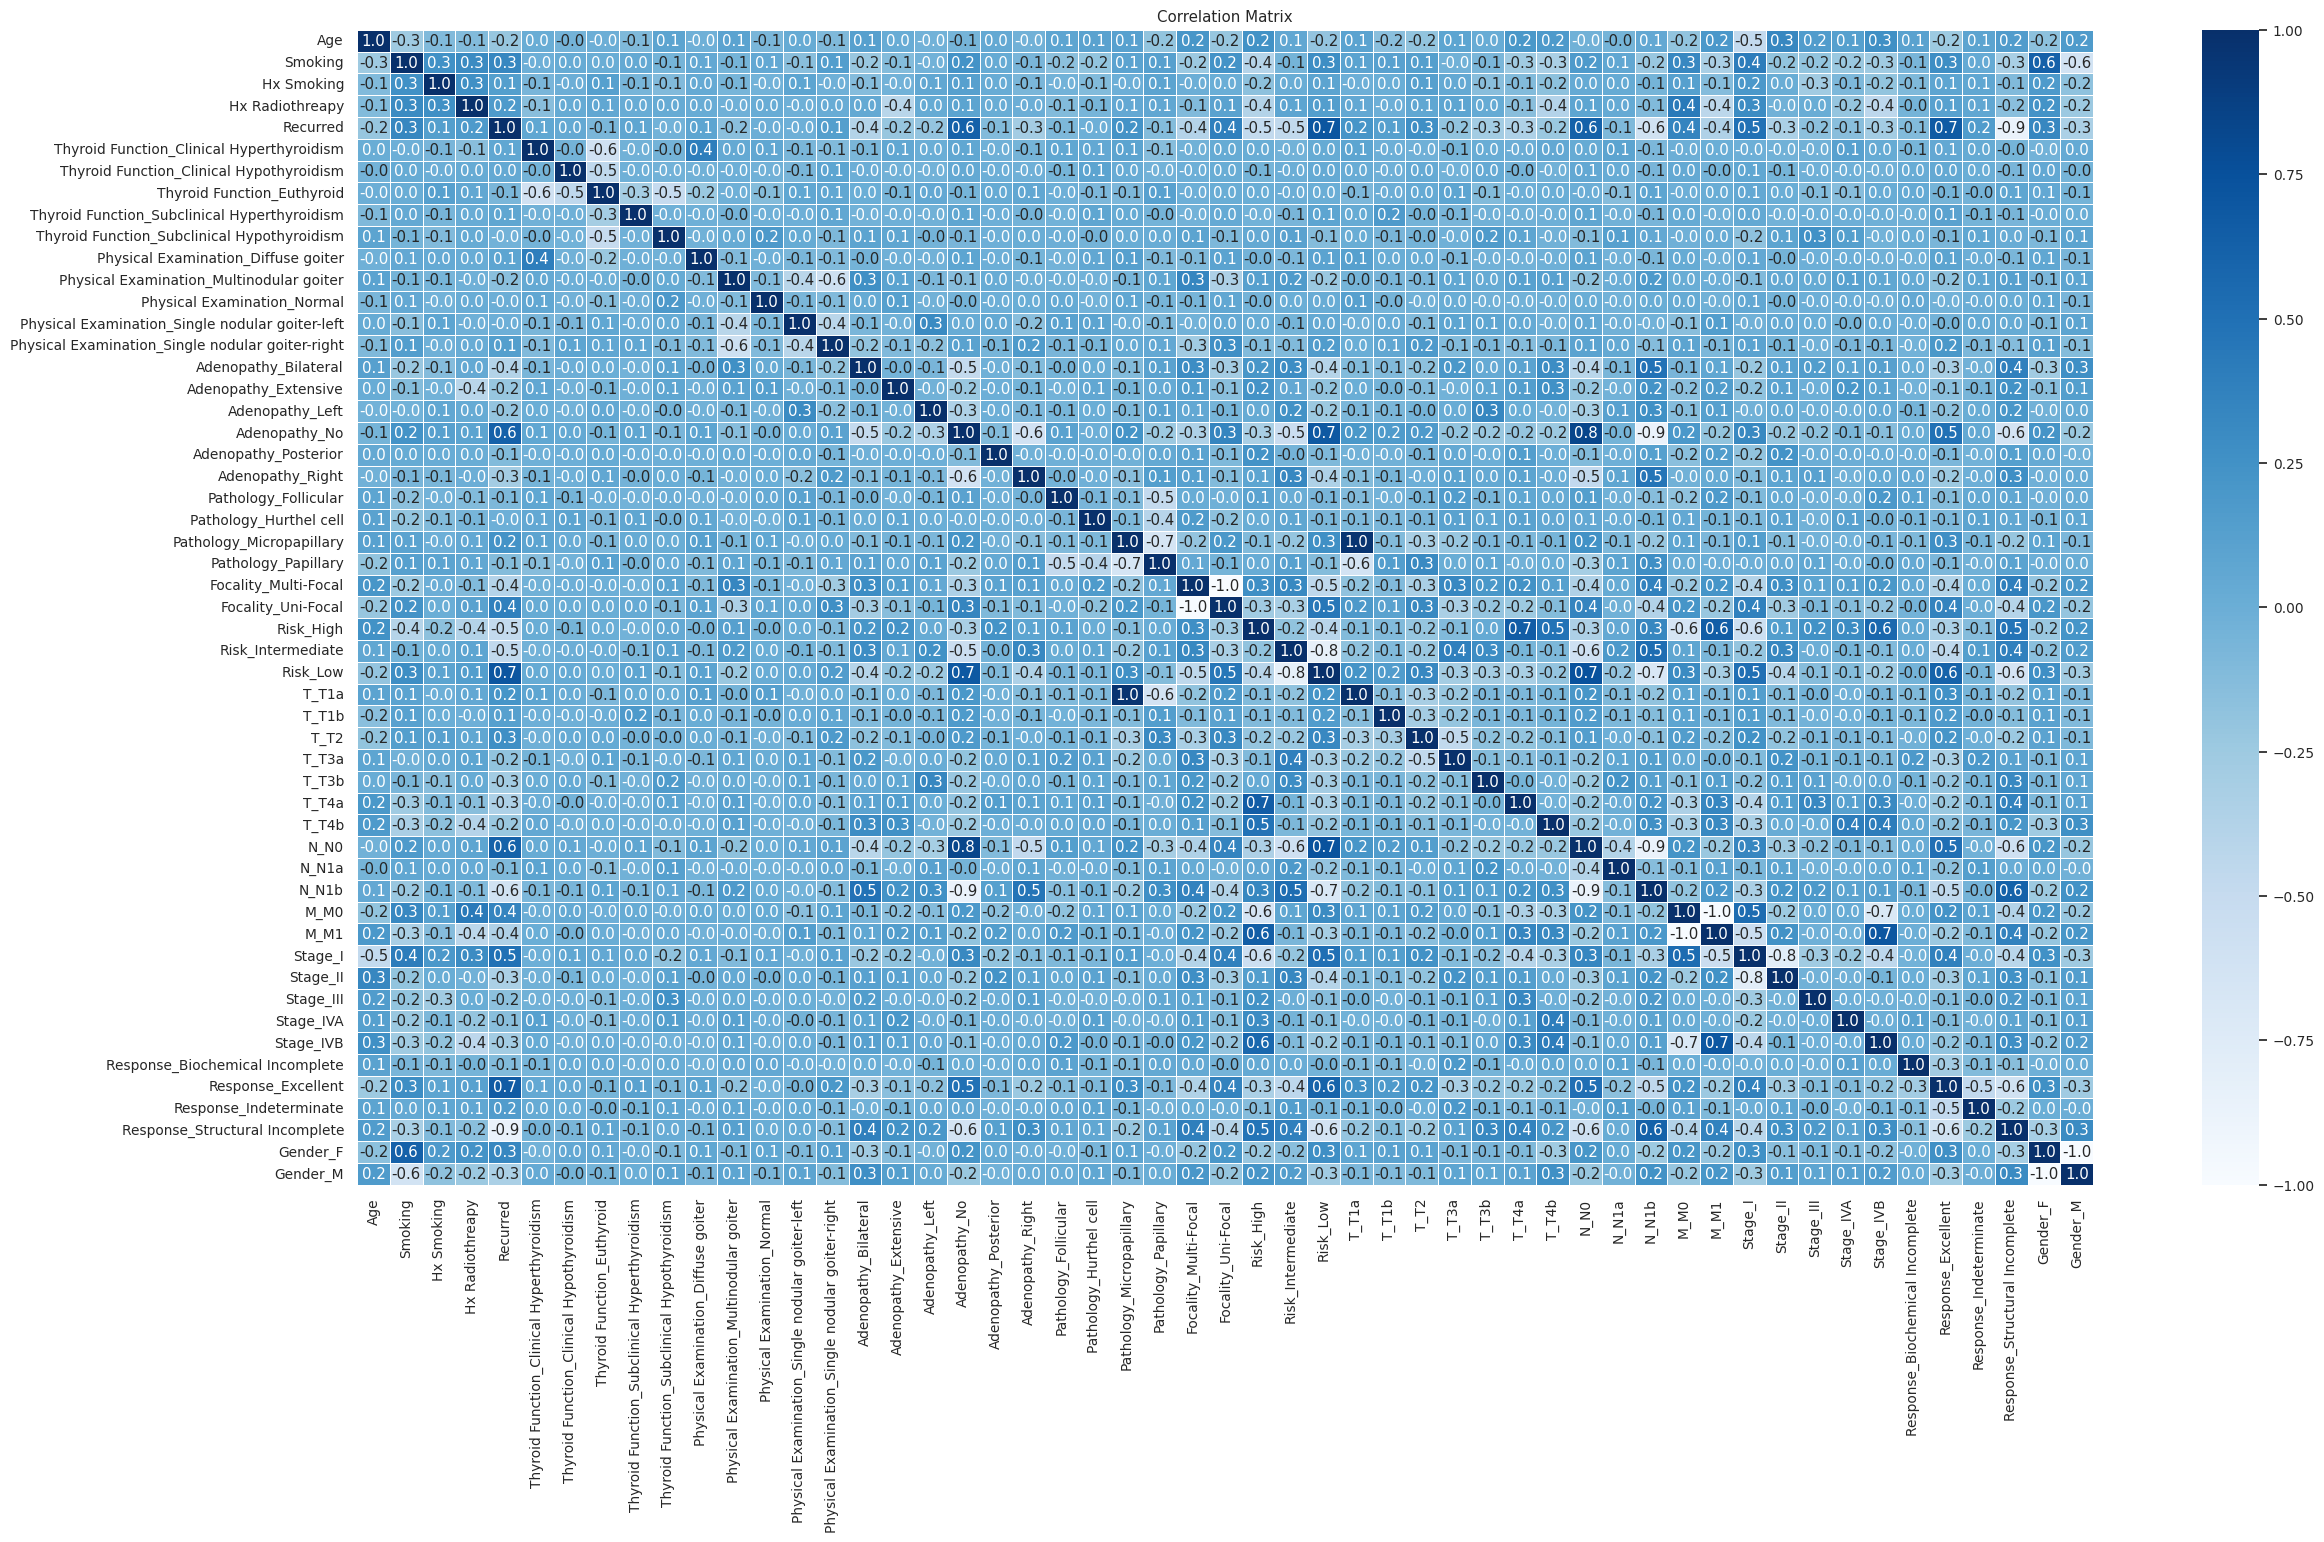

In [ ]:
#step5: verif correlation w/spearman car var ordinales
sns.set(font_scale=0.9)
df_heat=df_norm[variables]
corr= df_heat.corr(method='spearman')
fig=plt.figure(figsize=(28,15))
sns.heatmap(data=corr, annot=True,fmt='.1f', cmap='Blues', center=0, square=False, linewidths=.5)
plt.title('Correlation Matrix')
fig.savefig('heatmap_correlation.png')
plt.show()

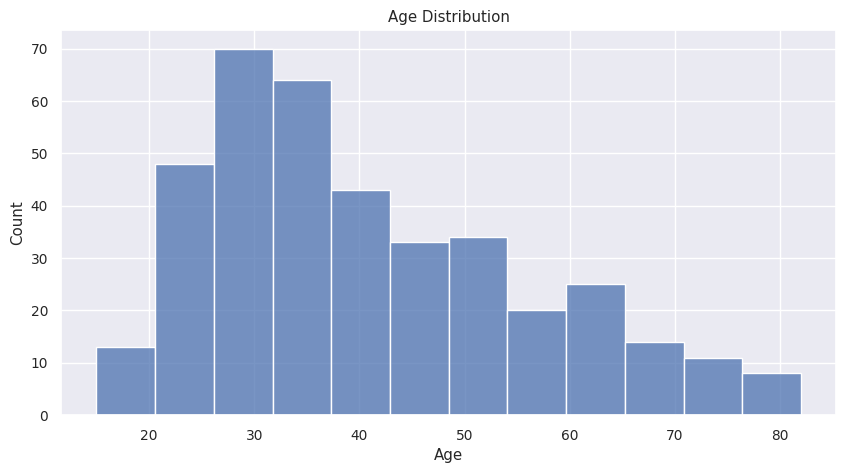

In [ ]:
#step6: other basic plot?
#distrib des vars (hist)

#age
fig=plt.figure(figsize=(10,5))
sns.histplot(df_norm['Age'])
plt.title('Age Distribution')
fig.savefig('age_distribution.png')
plt.show()

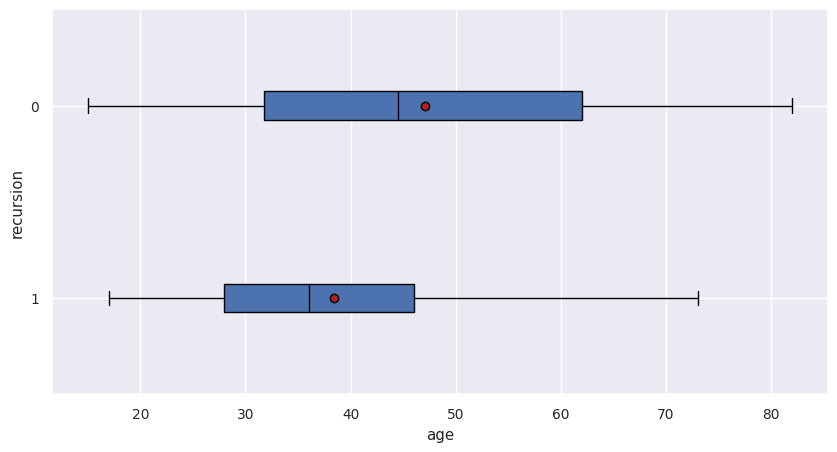

In [ ]:
#age par rapport à recurred==no
x= 'Recurred'
y='Age'
mods=df_norm[x].unique()
grps=[]
for m in mods:
  grps.append(df_norm[df_norm[x]==m][y])
fig=plt.figure(figsize=(10,5))
plt.boxplot(grps, labels=mods, showfliers=False, medianprops={'color': 'black'}, vert=False, patch_artist=True, showmeans=True, meanprops={'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'})
plt.ylabel('recursion')
plt.xlabel('age')
fig.savefig('recursion_distrib_based_on_age.png')
plt.show()

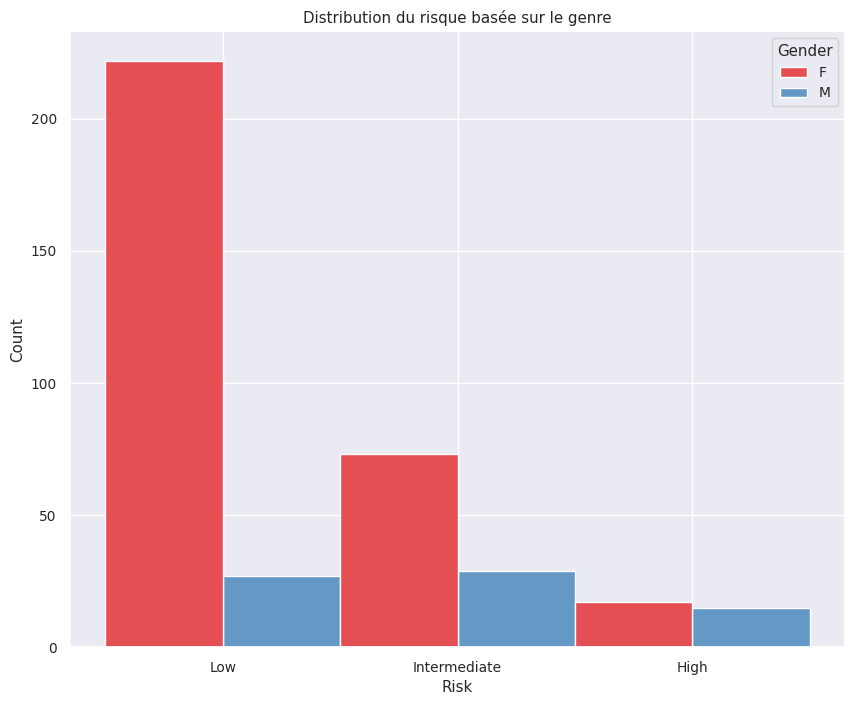

In [ ]:
#risk based on gender
fig = plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Risk', hue='Gender', palette='Set1', multiple='dodge', bins=10)
plt.title('Distribution of risk based on gender')
plt.xlabel('Risk')
#plt.legend()
plt.show()

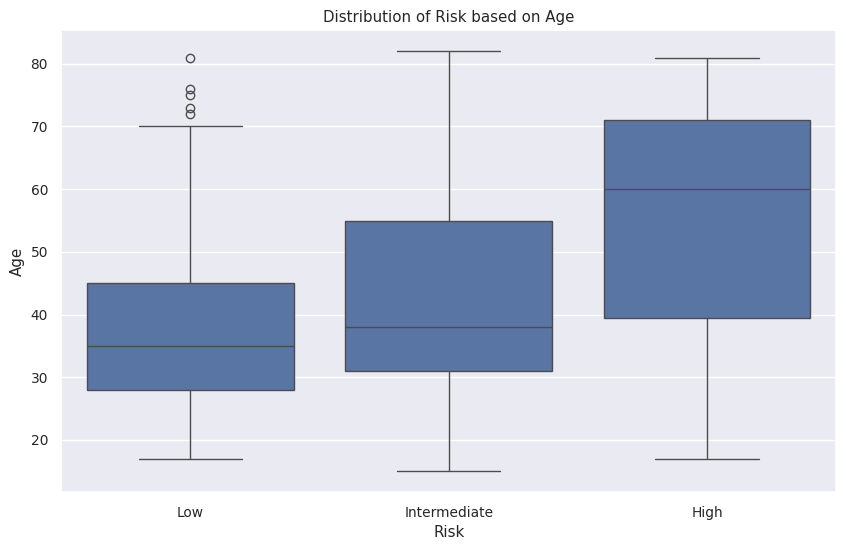

In [ ]:
#risk based on age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Age', data=df)
plt.title('Distribution of Risk based on Age')
plt.show()

THE MORE OF AN ML STUFF

In [ ]:
#regression logistic

In [ ]:
#survie?

In [ ]:
#interactions

In [ ]:
#decision tree & random forest

In [ ]:
#selection des caracteristiques (par rfe)

In [ ]:
#qsts: Facteurs de Risque
